In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12


# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Model1
model = Sequential()

#Layer1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer3
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
____

In [3]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.6836 - acc: 0.7740 - val_loss: 0.1218 - val_acc: 0.9645
Epoch 2/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2232 - acc: 0.9344 - val_loss: 0.0946 - val_acc: 0.9713
Epoch 3/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1742 - acc: 0.9492 - val_loss: 0.0776 - val_acc: 0.9767
Epoch 4/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1472 - acc: 0.9581 - val_loss: 0.0705 - val_acc: 0.9791
Epoch 5/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1293 - acc: 0.9624 - val_loss: 0.0639 - val_acc: 0.9813
Epoch 6/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1145 - acc: 0.9674 - val_loss: 0.0655 - val_acc: 0.9814
Epoch 7/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1088 - acc: 0.9693 - val_loss: 0.0604 - val_acc

In [4]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04986275624322734
Test accuracy: 0.9864


In [0]:
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

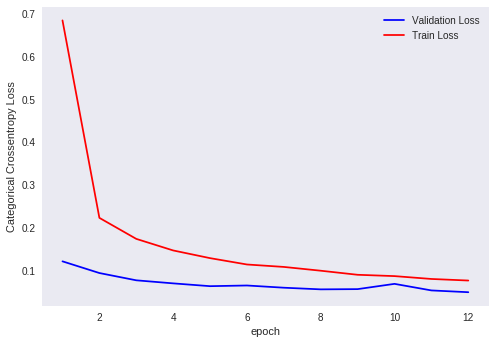

In [6]:

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**MODEL - 2**

In [0]:
model = Sequential()

#Layer1
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer2
model.add(Conv2D(64, (5, 5), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer3
model.add(Conv2D(32, (5, 5), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides =(1,1)))

#Layer4
model.add(Conv2D(64, (5, 5), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2))),

#Layer5
model.add(Conv2D(64, (5,5), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          51232     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 64)          51264     
__________

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 219s 4ms/step - loss: 0.4345 - acc: 0.8586 - val_loss: 0.0451 - val_acc: 0.9851
Epoch 2/12
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0647 - acc: 0.9827 - val_loss: 0.0437 - val_acc: 0.9873
Epoch 3/12
60000/60000 [==============================] - 218s 4ms/step - loss: 0.0421 - acc: 0.9889 - val_loss: 0.0291 - val_acc: 0.9919
Epoch 4/12
60000/60000 [==============================] - 217s 4ms/step - loss: 0.0310 - acc: 0.9921 - val_loss: 0.0374 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0228 - acc: 0.9942 - val_loss: 0.0489 - val_acc: 0.9875
Epoch 6/12
60000/60000 [==============================] - 218s 4ms/step - loss: 0.0176 - acc: 0.9951 - val_loss: 0.0245 - val_acc: 0.9928
Epoch 7/12
60000/60000 [==============================] - 218s 4ms/step - loss: 0.0146 - acc: 0.9964 - val_loss: 0.0297 - 

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.035109956039827035
Test accuracy: 0.9934


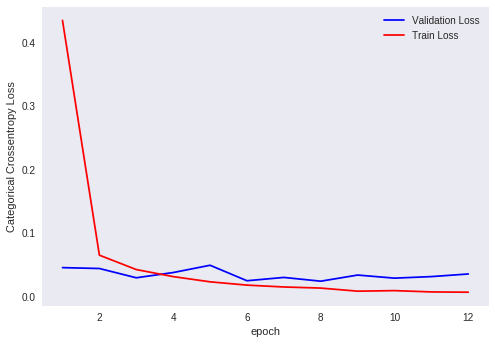

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**MODEL-3**

In [9]:
model = Sequential()

#Layer1
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

#Layer2
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

#Layer3
model.add(Conv2D(32, (5, 5), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides =(1,1)))

#Layer4
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides =(1,1)))

#Layer5
model.add(Conv2D(64, (5,5), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer6
model.add(Conv2D(32, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides =(1,1)))

#Layer7
model.add(Conv2D(64, (5,5), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        51232     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 64)        18496     
__________

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [11]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1719s 29ms/step - loss: 0.4054 - acc: 0.8668 - val_loss: 0.1211 - val_acc: 0.9660
Epoch 2/12
60000/60000 [==============================] - 1703s 28ms/step - loss: 0.0850 - acc: 0.9763 - val_loss: 0.0482 - val_acc: 0.9869
Epoch 3/12
60000/60000 [==============================] - 1708s 28ms/step - loss: 0.0614 - acc: 0.9821 - val_loss: 0.0696 - val_acc: 0.9783
Epoch 4/12
60000/60000 [==============================] - 1720s 29ms/step - loss: 0.0489 - acc: 0.9857 - val_loss: 0.0442 - val_acc: 0.9850
Epoch 5/12
60000/60000 [==============================] - 1706s 28ms/step - loss: 0.0411 - acc: 0.9882 - val_loss: 0.0444 - val_acc: 0.9881
Epoch 6/12
60000/60000 [==============================] - 1706s 28ms/step - loss: 0.0353 - acc: 0.9895 - val_loss: 0.0221 - val_acc: 0.9935
Epoch 7/12
60000/60000 [==============================] - 1725s 29ms/step - loss: 0.0332 - acc: 0.9903 - val_l

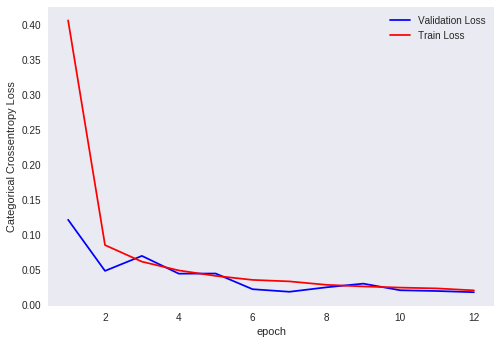

In [12]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Summary**

| Model | No of layers | Test Accuracy |
|-------|--------------|---------------|
| M1    | 3            | 0.986         |
| M2    | 5            | 0.993         |
| M3    | 7            | 0.994         |
